# Approach 1

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns; sns.set()
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr
import calendar
from numpy import linspace

working_dir = os.getcwd()

In [2]:
df = pd.read_csv(working_dir+"/data/combined_data.csv", header=0, index_col=0, parse_dates=[0])
df[['Close','TotalVolume']] = df[['Close','TotalVolume']].fillna(method='ffill')
df['Volume'] = df['Volume'].fillna(value=0)
df=df.fillna(method="bfill", axis=1)

In [3]:
df

,Open,High,Low,Close,TotalVolume,Volume
2016-01-03 19:01:00,359.50,360.00,359.00,359.75,1215.0,1215.0
2016-01-03 19:02:00,359.75,359.75,359.25,359.50,1715.0,500.0
2016-01-03 19:03:00,359.50,359.50,359.00,359.00,2059.0,344.0
2016-01-03 19:04:00,359.00,359.25,359.00,359.00,2077.0,18.0
2016-01-03 19:05:00,359.00,359.00,359.00,359.00,2119.0,42.0
2016-01-03 19:06:00,359.25,359.25,359.00,359.25,2129.0,10.0
2016-01-03 19:07:00,359.00,359.25,358.75,359.00,2231.0,102.0
2016-01-03 19:08:00,359.00,359.00,358.75,358.75,2317.0,86.0
2016-01-03 19:09:00,358.75,359.00,358.75,359.00,2330.0,13.0
2016-01-03 19:10:00,359.00,359.00,358.75,359.00,2400.0,70.0


In [4]:
def compute_return(TIME_WINDOW):

    # Compute the return as (Close Price - Open Price)/Open Price
    df['Return_'+str(TIME_WINDOW)] = (df.Close-df.Open.shift(TIME_WINDOW-1))/df.Open.shift(TIME_WINDOW-1)
    
    # Compute the log (CP/OP)
    df['Log_'+str(TIME_WINDOW)] = np.log((df.Close/df.Open.shift(TIME_WINDOW-1)))
    
    # Compute the log return
    df['LogRet_'+str(TIME_WINDOW)] = df.Close.rolling(TIME_WINDOW).apply(lambda x: np.log(x[-1] / x[0]))
    
    # Compute the RR = (High-Low)/Low
    df['RR'] = (df.High-df.Low)/df.Low
    
    # Take the right time period
    # 19;01-19:00+time_window
    # 8:31-8:30+time_window
    df[(df.index.time >= datetime.time(19, 1)) & (df.index.time <= datetime.time(19, TIME_WINDOW-1))] = np.nan
    df_return=df.dropna(how='all',axis=0)
    return (df_return)


In [5]:
all_data=compute_return(5)
all_data

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.


,Open,High,Low,Close,TotalVolume,Volume,Return_5,Log_5,LogRet_5,RR
2016-01-03 19:05:00,359.00,359.00,359.00,359.00,2119.0,42.0,-0.001391,-0.001392,-0.002087,0.000000
2016-01-03 19:06:00,359.25,359.25,359.00,359.25,2129.0,10.0,-0.001390,-0.001391,-0.000696,0.000696
2016-01-03 19:07:00,359.00,359.25,358.75,359.00,2231.0,102.0,-0.001391,-0.001392,0.000000,0.001394
2016-01-03 19:08:00,359.00,359.00,358.75,358.75,2317.0,86.0,-0.000696,-0.000697,-0.000697,0.000697
2016-01-03 19:09:00,358.75,359.00,358.75,359.00,2330.0,13.0,0.000000,0.000000,0.000000,0.000697
2016-01-03 19:10:00,359.00,359.00,358.75,359.00,2400.0,70.0,-0.000696,-0.000696,-0.000696,0.000697
2016-01-03 19:11:00,359.25,359.25,358.75,358.75,2447.0,47.0,-0.000696,-0.000697,-0.000697,0.001394
2016-01-03 19:12:00,358.75,358.75,358.75,358.75,2447.0,0.0,-0.000696,-0.000697,0.000000,0.000000
2016-01-03 19:13:00,359.00,359.00,359.00,359.00,2517.0,70.0,0.000697,0.000697,0.000000,0.000000
2016-01-03 19:14:00,359.00,359.00,358.75,359.00,2586.0,69.0,0.000000,0.000000,0.000000,0.000697


In [6]:
#all_data = pd.read_csv(working_dir+"/data/day_data.csv", header=0, index_col=0, parse_dates=[0])

## Plotting (5-min)
#### 1. KDE of every month and construct 12 new columns indicating outlier (3 * std) based on monthly distribution
#### 2. KDE based on (Closing Price - Opening Price) / Opening Price
#### 3. KDE based on Log (Closing Price / Opening Price)
#### 3. KDE based on (High Price - Low Price)/Low Price

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Skewness: 
[2.5105132035418753, 0.3671443848162819, 0.9019827229112353, -1.9853412494389955, 3.0708713995315238, -0.3628031679026927, -0.7012104632728379, -2.629088823081525, -0.7375211786420411, 2.1312376759081304, -0.17927986912918303, 0.4785797028430653]
Kurtosis: 
[128.89789741028181, 13.6581754655871, 113.76054492213649, 78.82741152463413, 131.3596434770515, 31.634141039665767, 46.92698446289805, 94.45548383442816, 54.67239213692475, 75.10926902688988, 30.42882922813091, 11.670732001038715]


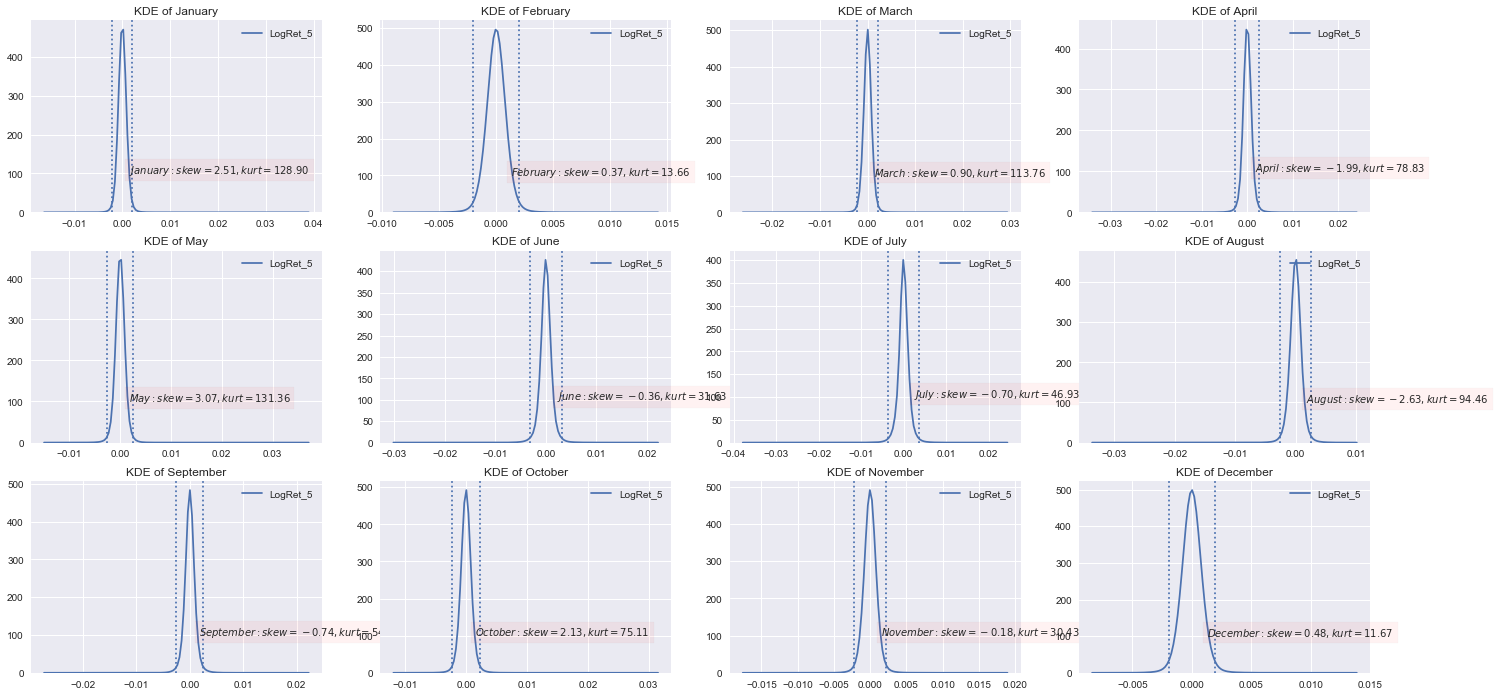

In [7]:
skew_list_1=[]
kurt_list_1=[]
plt.figure(figsize=(24,12))
for i in range(1,13):
    x=all_data.loc[all_data.index.month==i]
    x=x.dropna(axis=0)
    skew=x["LogRet_5"].skew()
    kurt=x["LogRet_5"].kurt()
    mean=x["LogRet_5"].mean()
    std=x["LogRet_5"].std()
    max_x=x["LogRet_5"].max()
    #print ("Skewness of Month_"+str(i))
    #print (x.skew())
    skew_list_1.append(skew)
    #print ("Kurtosis of Month_"+str(i))
    #print (x.kurt())
    kurt_list_1.append(kurt)
    plt.subplot(3,4,i)
    sns.kdeplot(x["LogRet_5"],shade=False,bw=0.0006)
    info = r'$%s:skew=%.2f,kurt=%.2f$' %(calendar.month_name[i],skew,kurt)
    plt.text(mean+2*std,100,info,fontsize=10,bbox=dict(facecolor='red',alpha=0.05))
    plt.legend(loc='upper right', fontsize=10)
    plt.axvline(mean+3*std,ls=":")
    plt.axvline(mean-3*std,ls=":")
    plt.title("KDE of "+calendar.month_name[i])
    
    # Construct new columns in the dataframe
    all_data["Month_"+str(i)+"_Flag"] = all_data["LogRet_5"].apply(lambda x: 1 if x > mean+3*std or x < mean-3*std else 0)

print ('Skewness: ')
print (skew_list_1)
print ('Kurtosis: ')
print (kurt_list_1)
plt.savefig("KDE for Every Month")

In [8]:
def plot_return(columnname,bw_tune,xlocation,ylocation):

    plt.figure(figsize=(12,6))
    skew_list=[]
    kurt_list=[]

    for i in range(1,13):
        x=all_data.loc[all_data.index.month==i]
        x=x.dropna(axis=0)
        skew=x[str(columnname)].skew()
        kurt=x[str(columnname)].kurt()
        mean=x[str(columnname)].mean()
        std=x[str(columnname)].std()
        max_x=x[str(columnname)].max()
        skew_list.append(skew)
        kurt_list.append(kurt)
        sns.kdeplot(x[str(columnname)],shade=False,bw=bw_tune,legend=True,label=calendar.month_name[i])
        info = r'$%s:skew=%.2f,kurt=%.2f$' %(calendar.month_name[i],skew,kurt)
        plt.text(xlocation,ylocation*i,info,bbox=dict(facecolor='red',alpha=0.05))
    c ={str(columnname)+'Skew':skew_list,str(columnname)+'Kurt':kurt_list}
    moment=pd.DataFrame(c)
    print ('Skewness: ')
    print (skew_list)
    print ('Kurtosis: ')
    print (kurt_list)
    plt.title("KDE of "+str(columnname))
    plt.savefig("KDE of "+str(columnname))
    return (moment)

In [9]:
moment_save=pd.DataFrame()

Skewness: 
[5.241101216294687, 2.034625802766775, 8.066858550584154, 3.5304589830190967, 6.16391634580671, 4.409867447141413, 4.0417031592652695, 5.80334362879429, 5.9252113091451974, 6.825572901829836, 3.210569868866918, 2.059678048521854]
Kurtosis: 
[159.4573682494128, 9.030264083367435, 295.76974297160035, 39.65511324902679, 256.83044979646786, 63.83552069325032, 62.90771121171335, 196.40104548280718, 156.1148034525372, 261.36512595339804, 36.63701515614445, 10.443420286148914]


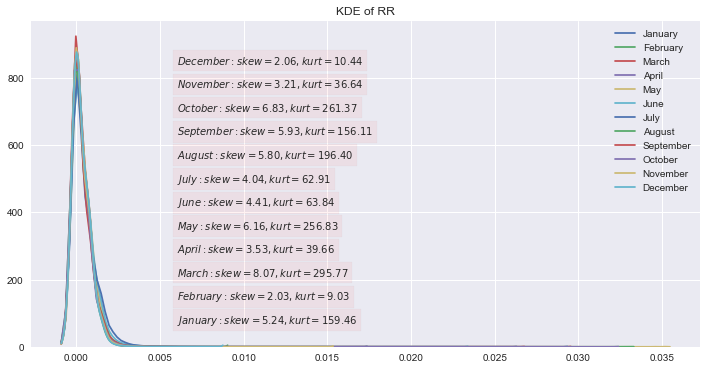

In [10]:
temp=plot_return('RR',0.0003,0.006,70)
moment_save=pd.concat([moment_save,temp],axis=1)

Skewness: 
[2.2443048763369005, 0.36430041528568485, 1.0158980372282023, -2.144083795913113, 2.871427627636848, -0.36726126781984786, -0.5021497559752494, -2.389417784639492, -0.6748812640512808, 2.025290769790625, -0.25193467671906483, 0.48562024135678755]
Kurtosis: 
[100.29651084151276, 15.093932273407582, 99.71512680202142, 72.30250700466578, 110.25001099825612, 30.165901484336235, 37.8262852239628, 81.47844373045794, 61.702763007730454, 65.43222137153138, 30.259867062424505, 13.620095991072331]


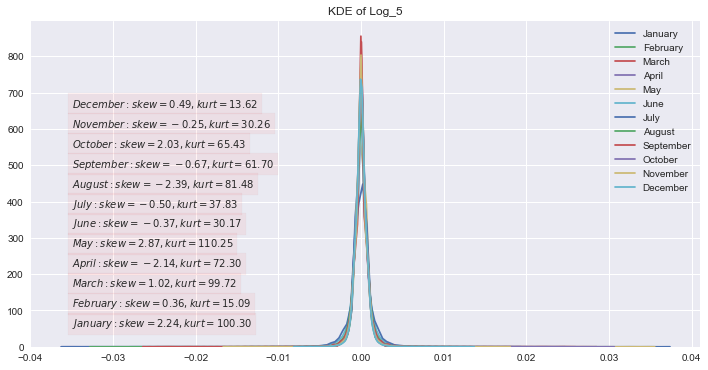

In [11]:
temp=plot_return('Log_5',0.0003,-0.035,55)
moment_save=pd.concat([moment_save,temp],axis=1)

Skewness: 
[2.5105132035418753, 0.3671443848162819, 0.9019827229112353, -1.9853412494389955, 3.0708713995315238, -0.3628031679026927, -0.7012104632728379, -2.629088823081525, -0.7375211786420411, 2.1312376759081304, -0.17927986912918303, 0.4785797028430653]
Kurtosis: 
[128.89789741028181, 13.6581754655871, 113.76054492213649, 78.82741152463413, 131.3596434770515, 31.634141039665767, 46.92698446289805, 94.45548383442816, 54.67239213692475, 75.10926902688988, 30.42882922813091, 11.670732001038715]


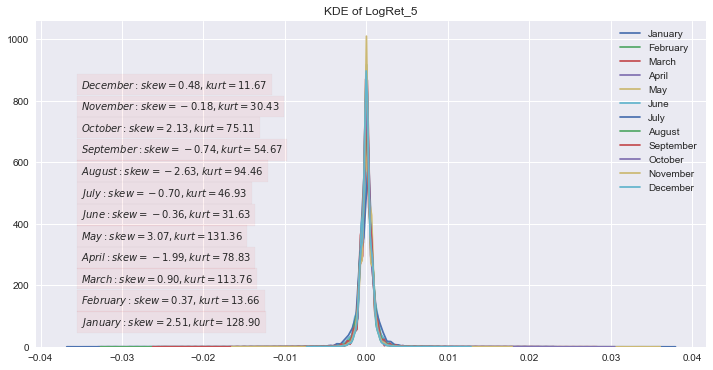

In [12]:
temp=plot_return('LogRet_5',0.00025,-0.035,70)
moment_save=pd.concat([moment_save,temp],axis=1)

Skewness: 
[2.3553845458547267, 0.3824398559282152, 1.1330673171654184, -2.046677197347994, 3.0148122953605054, -0.31161957952262287, -0.42406665878631344, -2.28404368410818, -0.5882903286360565, 2.1025565171785514, -0.21430678338327383, 0.501719853072536]
Kurtosis: 
[106.03832488721122, 15.211390828838862, 101.59488605190441, 69.31838498893548, 116.16682197213778, 29.671896032192496, 36.82929035150651, 77.67581009381084, 60.92262258930862, 67.98335704107568, 30.131739808895837, 13.749079366886155]


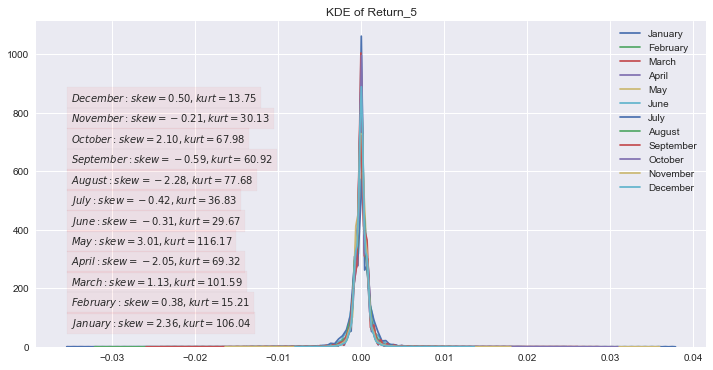

In [13]:
temp=plot_return('Return_5',0.00025,-0.035,70)
moment_save=pd.concat([moment_save,temp],axis=1)

In [14]:
moment_save

,RRSkew,RRKurt,Log_5Skew,Log_5Kurt,LogRet_5Skew,LogRet_5Kurt,Return_5Skew,Return_5Kurt
0,5.241101,159.457368,2.244305,100.296511,2.510513,128.897897,2.355385,106.038325
1,2.034626,9.030264,0.364300,15.093932,0.367144,13.658175,0.382440,15.211391
2,8.066859,295.769743,1.015898,99.715127,0.901983,113.760545,1.133067,101.594886
3,3.530459,39.655113,-2.144084,72.302507,-1.985341,78.827412,-2.046677,69.318385
4,6.163916,256.830450,2.871428,110.250011,3.070871,131.359643,3.014812,116.166822
5,4.409867,63.835521,-0.367261,30.165901,-0.362803,31.634141,-0.311620,29.671896
6,4.041703,62.907711,-0.502150,37.826285,-0.701210,46.926984,-0.424067,36.829290
7,5.803344,196.401045,-2.389418,81.478444,-2.629089,94.455484,-2.284044,77.675810
8,5.925211,156.114803,-0.674881,61.702763,-0.737521,54.672392,-0.588290,60.922623
9,6.825573,261.365126,2.025291,65.432221,2.131238,75.109269,2.102557,67.983357


In [22]:
moment_save.index

RangeIndex(start=0, stop=12, step=1)

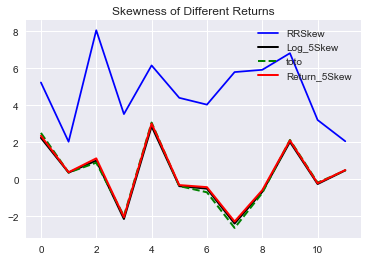

In [28]:
#['RRSkew', 'RRKurt', 'Log_5Skew', 'Log_5Kurt', 'LogRet_5Skew','LogRet_5Kurt', 'Return_5Skew', 'Return_5Kurt']
plt.plot(moment_save.index, moment_save['RRSkew'], color='blue')
plt.plot( moment_save.index,moment_save['Log_5Skew'], marker='', color='black', linewidth=2)
plt.plot( moment_save.index,moment_save['LogRet_5Skew'], marker='', color='green', linewidth=2, linestyle='dashed', label="toto")
plt.plot( moment_save.index,moment_save['Return_5Skew'], marker='', color='red', linewidth=2)
plt.title('Skewness of Different Returns')
plt.legend()


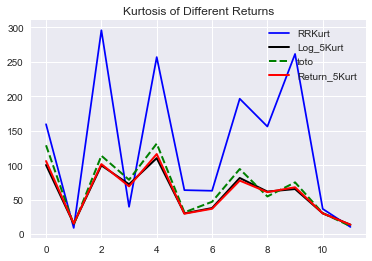

In [29]:
plt.plot(moment_save.index, moment_save['RRKurt'], color='blue')
plt.plot( moment_save.index,moment_save['Log_5Kurt'], marker='', color='black', linewidth=2)
plt.plot( moment_save.index,moment_save['LogRet_5Kurt'], marker='', color='green', linewidth=2, linestyle='dashed', label="toto")
plt.plot( moment_save.index,moment_save['Return_5Kurt'], marker='', color='red', linewidth=2)
plt.title('Kurtosis of Different Returns')
plt.legend()

## T-distribution of 2016 & Empirical Distribution of 2017

In [16]:
from scipy.stats import t
data_2016=all_data.loc[all_data.index.year==2016]
data_2016=data_2016.dropna(axis=0)

data_2017=all_data.loc[all_data.index.year==2017]
data_2017=data_2017.dropna(axis=0)

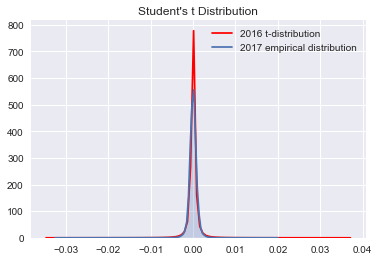

(1.543819595341964, -9.893112055465411e-07, 0.0004160520939759021)
-9.893112055465411e-07
inf
nan
nan
The outlier based on t-distribution of 2016 should be out of the interval:[ -inf , inf ]
The outlier based on empirical distribution of 2016 should be out of the interval:[ -0.00319904613832683 , 0.0031974466933732217 ]
The outlier based on empirical distribution of 2017 should be out of the interval:[ -0.002490828836671718 , 0.002479893532406917 ]


In [17]:
x = linspace(data_2016['Return_5'].min(),data_2016['Return_5'].max(),100)
param = t.fit(data_2016['Return_5'])
pdf_fitted = t.pdf(x,loc=param[1], scale=param[2], df=param[0])

plt.title('Student\'s t Distribution')
# Plot the t-distribution of 2016
plt.plot(x,pdf_fitted,'r-',label='2016 t-distribution')
# Plot the empirical distribution of 2016
#sns.distplot(data_2016['Return_5'],hist=False, kde=True)

# Plot the empirical distribution of 2017
sns.kdeplot(data_2017['Return_5'],shade=True,bw=0.0004,kernel='gau',legend=True,label='2017 empirical distribution')
plt.show()
# Print the parameter of t-distribution
print(param)

# Compute the characteristics of distribution
mean, var, skew, kurt = t.stats(loc=param[1], scale=param[2], df=param[0], moments='mvsk')
std=t.std(loc=param[1], scale=param[2], df=param[0])
print (mean)
print (std)
print (skew)
print (kurt)
print ('The outlier based on t-distribution of 2016 should be out of the interval:[',mean-3*std,',',mean+3*std,']')
skew_em=data_2016['Return_5'].skew()
kurt_em=data_2016['Return_5'].kurt()
mean_em=data_2016['Return_5'].mean()
std_em=data_2016['Return_5'].std()
print ('The outlier based on empirical distribution of 2016 should be out of the interval:[',\
       mean_em-3*std_em,',',mean_em+3*std_em,']')

skew_em_2017=data_2017['Return_5'].skew()
kurt_em_2017=data_2017['Return_5'].kurt()
mean_em_2017=data_2017['Return_5'].mean()
std_em_2017=data_2017['Return_5'].std()

print ('The outlier based on empirical distribution of 2017 should be out of the interval:[',\
       mean_em_2017-3*std_em_2017,',',mean_em_2017+3*std_em_2017,']')
